In [4]:
%pip install requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import requests

In [6]:
import pandas as pd

AttributeError: partially initialized module 'pandas' from 'C:\Users\Kamal raj\AppData\Roaming\Python\Python313\site-packages\pandas\__init__.py' has no attribute '_pandas_datetime_CAPI' (most likely due to a circular import)

In [3]:
total_record = []
page = 1
page_size = 1000  # reduce if API doesn't allow 1000


max_pages = 121    # 121* 1000 = 12000

while page <= max_pages:
    url =url = f"https://world.openfoodfacts.org/api/v2/search?categories=chocolates&fields=code,product_name,brands,nutriments&page_size=1000&page={page}"

    response = requests.get(url)



    if response.status_code == 200:
        data = response.json()
        total_record.extend(data.get("products", []))  # <-- key is "products" not "records"
    else:
        print(f"Failed to fetch page {page}: {response.status_code}")
        
        break

    page += 1




In [4]:
display(total_record)

[{'brands': 'Sidi Ali',
  'code': '6111035000430',
  'nutriments': {'carbohydrates': 42,
   'carbohydrates_100g': 4.2,
   'carbohydrates_serving': 42,
   'carbohydrates_unit': 'g',
   'carbohydrates_value': 42,
   'energy': 20,
   'energy-kcal': 0,
   'energy-kcal_100g': 0,
   'energy-kcal_serving': 0,
   'energy-kcal_unit': 'kcal',
   'energy-kcal_value': 0,
   'energy-kcal_value_computed': 168,
   'energy-kj': 20,
   'energy-kj_100g': 2,
   'energy-kj_serving': 20,
   'energy-kj_unit': 'kj',
   'energy-kj_value': 20,
   'energy-kj_value_computed': 714,
   'energy_100g': 2,
   'energy_serving': 20,
   'energy_unit': 'kj',
   'energy_value': 20,
   'fat': 0,
   'fat_100g': 0,
   'fat_serving': 0,
   'fat_unit': 'g',
   'fat_value': 0,
   'fiber': 0,
   'fiber_100g': 0,
   'fiber_serving': 0,
   'fiber_unit': 'g',
   'fiber_value': 0,
   'fruits-vegetables-legumes-estimate-from-ingredients_100g': 0,
   'fruits-vegetables-legumes-estimate-from-ingredients_serving': 0,
   'fruits-vegetabl

In [5]:
display(total_record[0].keys())

dict_keys(['brands', 'code', 'nutriments', 'product_name'])

In [6]:
display(len(total_record))

12097

In [7]:
import pandas as pd
df=pd.DataFrame(total_record)

In [10]:
display(df.head())

brands           code  \
0                              Sidi Ali  6111035000430   
1                                Jaouda  6111242100992   
2                              sidi ali  6111035002175   
3  Les Eaux Minérales d'oulmès,Sidi Ali  6111035000058   
4                              AQUAFINA  6111252421568   

                                          nutriments            product_name  
0  {'carbohydrates': 42, 'carbohydrates_100g': 4....                Sidi Ali  
1  {'calcium': 0.25, 'calcium_100g': 0.25, 'calci...                   Perly  
2  {'chloride': 0.014, 'chloride_100g': 0.014, 'c...                Sidi Ali  
3  {'fruits-vegetables-legumes-estimate-from-ingr...  Eau minérale naturelle  
4  {'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...                اكوافينا

In [9]:
# Flatten the nutriments dictionary into columns
nutri_df_selected = pd.json_normalize(df['nutriments'])
df_selected = df.drop(columns=['nutriments']).join(nutri_df_selected)

In [11]:
df_selected.head()

brands           code  \
0                              Sidi Ali  6111035000430   
1                                Jaouda  6111242100992   
2                              sidi ali  6111035002175   
3  Les Eaux Minérales d'oulmès,Sidi Ali  6111035000058   
4                              AQUAFINA  6111252421568   

             product_name  carbohydrates  carbohydrates_100g  \
0                Sidi Ali           42.0                 4.2   
1                   Perly            9.4                 9.4   
2                Sidi Ali            NaN                 NaN   
3  Eau minérale naturelle            NaN                 NaN   
4                اكوافينا            0.0                 0.0   

   carbohydrates_serving carbohydrates_unit  carbohydrates_value  energy  \
0                   42.0                  g                 42.0    20.0   
1                    9.4                  g                  9.4   406.0   
2                    NaN                NaN                  NaN     NaN   
3                    NaN                NaN                  NaN     NaN   
4                    0.0                  g                  0.0     0.0   

   energy-kcal  ...  plant-stanols_serving  plant-stanols_unit  \
0          0.0  ...                    NaN                 NaN   
1         97.0  ...                    NaN                 NaN   
2          NaN  ...                    NaN                 NaN   
3          NaN  ...                    NaN                 NaN   
4          0.0  ...                    NaN                 NaN   

  plant-stanols_value  beta-glucane-d-avoine  beta-glucane-d-avoine_100g  \
0                 NaN                    NaN                         NaN   
1                 NaN                    NaN                         NaN   
2                 NaN                    NaN                         NaN   
3                 NaN                    NaN                         NaN   
4                 NaN                    NaN                         NaN   

   beta-glucane-d-avoine_label  beta-glucane-d-avoine_modifier  \
0                          NaN                             NaN   
1                          NaN                             NaN   
2                          NaN                             NaN   
3                          NaN                             NaN   
4                          NaN                             NaN   

   beta-glucane-d-avoine_serving beta-glucane-d-avoine_unit  \
0                            NaN                        NaN   
1                            NaN                        NaN   
2                            NaN                        NaN   
3                            NaN                        NaN   
4                            NaN                        NaN   

   beta-glucane-d-avoine_value  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN  

[5 rows x 1411 columns]

In [12]:
#coloumnselection
# Select relevant columns from df_selected
selected_columns = {
    "code": "product_code",
    "product_name": "product_name",
    "brands": "brand",
    "energy-kcal_100g": "energy-kcal_value",
    "energy-kj_100g": "energy-kj_value",
    "carbohydrates_100g": "carbohydrates_value",
    "sugars_100g": "sugars_value",
    "fat_100g": "fat_value",
    "saturated-fat_100g": "saturated-fat_value",
    "proteins_100g": "proteins_value",
    "fiber_100g": "fiber_value",
    "salt_100g": "salt_value",
    "sodium_100g": "sodium_value",
    "nova-group": "nova-group",
    "nutrition-score-fr_100g": "nutrition-score-fr",
    "fruits-vegetables-nuts-estimate-from-ingredients_100g": "fruits-vegetables-nuts-estimate-from-ingredients_100g"
}

# Keep only these columns and rename them
df_selected = df_selected[list(selected_columns.keys())].rename(columns=selected_columns)


In [14]:
df_selected.head()

product_code            product_name  \
0  6111035000430                Sidi Ali   
1  6111242100992                   Perly   
2  6111035002175                Sidi Ali   
3  6111035000058  Eau minérale naturelle   
4  6111252421568                اكوافينا   

                                  brand  energy-kcal_value  energy-kj_value  \
0                              Sidi Ali                0.0              2.0   
1                                Jaouda               97.0            406.0   
2                              sidi ali                NaN              NaN   
3  Les Eaux Minérales d'oulmès,Sidi Ali                NaN              NaN   
4                              AQUAFINA                0.0              0.0   

   carbohydrates_value  sugars_value  fat_value  saturated-fat_value  \
0                  4.2           1.4        0.0                  0.0   
1                  9.4           NaN        3.0                  NaN   
2                  NaN           NaN        NaN                  NaN   
3                  NaN           NaN        NaN                  NaN   
4                  0.0           0.0        0.0                  0.0   

   proteins_value  fiber_value  salt_value  sodium_value  nova-group  \
0             0.0          0.0    0.000000      0.000000         NaN   
1             8.0          NaN         NaN           NaN         3.0   
2             NaN          NaN    0.065000      0.026000         NaN   
3             NaN          NaN    0.065000      0.026000         1.0   
4             0.0          0.0    0.000508      0.000203         NaN   

   nutrition-score-fr  fruits-vegetables-nuts-estimate-from-ingredients_100g  
0                 1.0                                                0.0      
1                 NaN                                                0.0      
2                 0.0                                                0.0      
3                 0.0                                                0.0      
4                 0.0                                                0.0

In [15]:
#reading & understanding the data 
display(df_selected.info())
display(df_selected.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12097 entries, 0 to 12096
Data columns (total 16 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   product_code                                           12097 non-null  object 
 1   product_name                                           11820 non-null  object 
 2   brand                                                  11540 non-null  object 
 3   energy-kcal_value                                      11236 non-null  float64
 4   energy-kj_value                                        6461 non-null   float64
 5   carbohydrates_value                                    11241 non-null  float64
 6   sugars_value                                           11045 non-null  float64
 7   fat_value                                              11265 non-null  float64
 8   saturated-fat_value                           

None

(12097, 16)

In [16]:
display(df_selected['product_code'].unique())

array(['6111035000430', '6111242100992', '6111035002175', ...,
       '3250390769811', '3560070581870', '3564700562802'],
      shape=(11998,), dtype=object)

In [17]:
(df.isnull().sum())


brands          557
code              0
nutriments        0
product_name    277
dtype: int64

In [18]:
(df_selected.isnull().sum())


product_code                                                0
product_name                                              277
brand                                                     557
energy-kcal_value                                         861
energy-kj_value                                          5636
carbohydrates_value                                       856
sugars_value                                             1052
fat_value                                                 832
saturated-fat_value                                      1127
proteins_value                                            842
fiber_value                                              3880
salt_value                                               1165
sodium_value                                             1165
nova-group                                               1299
nutrition-score-fr                                       1714
fruits-vegetables-nuts-estimate-from-ingredients_100g     760
dtype: i

In [19]:
df_selected.duplicated(subset='product_code').sum()

np.int64(99)

In [20]:
display(((df_selected['product_code'].unique())))

array(['6111035000430', '6111242100992', '6111035002175', ...,
       '3250390769811', '3560070581870', '3564700562802'],
      shape=(11998,), dtype=object)

In [21]:
cols_list = [
    
    "energy-kcal_value",
    "energy-kj_value",
    "carbohydrates_value",
    "sugars_value",
    "fat_value",
    "saturated-fat_value",
    "proteins_value",
    "fiber_value",
    "salt_value",
    "sodium_value",
    "nova-group",
    "nutrition-score-fr",
    "fruits-vegetables-nuts-estimate-from-ingredients_100g",
    
    
]

In [22]:
# Exclude product_code column when checking nulls
df_null_except_code = df_selected[df_selected[cols_list].isnull().all(axis=1)]

print(len(df_null_except_code))

353


In [23]:
# Drop those rows using their index
df_selected = df_selected.drop(df_null_except_code.index, axis=0)

In [24]:
df_selected[['product_name', 'brand']].isnull().sum()

product_name    109
brand           333
dtype: int64

In [25]:
df_selected.isnull().mean() * 100

product_code                                              0.000000
product_name                                              0.928134
brand                                                     2.835490
energy-kcal_value                                         4.325613
energy-kj_value                                          44.984673
carbohydrates_value                                       4.283038
sugars_value                                              5.951975
fat_value                                                 4.078678
saturated-fat_value                                       6.590599
proteins_value                                            4.163828
fiber_value                                              30.032357
salt_value                                                6.914169
sodium_value                                              6.914169
nova-group                                                8.055177
nutrition-score-fr                                       11.58

As the brand and product null value is less in percentage without those values i dont find a logic in having all other details i wish drop null values

In [26]:
# Drop rows where product_name is null
df_selected = df_selected.dropna(subset=['product_name'])

# Fill brand nulls with 'Unknown'
df_selected['brand'] = df_selected['brand'].fillna('Unknown')

In [27]:
#filling null values using mathematical relationship
def fill_energy(row):
    kcal = row["energy-kcal_value"]
    kj = row["energy-kj_value"]
    
    # Case 1: kcal missing but kj available → convert to kcal
    if pd.isna(kcal) and pd.notna(kj):
        row["energy-kcal_value"] = kj * 0.239
    
    # Case 2: kj missing but kcal available → convert to kj
    if pd.isna(kj) and pd.notna(kcal):
        row["energy-kj_value"] = kcal * 4.184
    
    return row

df_selected = df_selected.apply(fill_energy, axis=1)
def fill_salt_sodium(row):
    salt = row["salt_value"]
    sodium = row["sodium_value"]
    
    # Case 1: salt missing but sodium exists → compute salt
    if pd.isna(salt) and pd.notna(sodium):
        row["salt_value"] = round(sodium * 2.54, 3)   # keep 3 decimals
    
    # Case 2: sodium missing but salt exists → compute sodium
    if pd.isna(sodium) and pd.notna(salt):
        row["sodium_value"] = round(salt / 2.54, 3)
    
    return row

# Apply to dataframe
df_selected = df_selected.apply(fill_salt_sodium, axis=1)

In [28]:
df_selected.duplicated().sum() 

np.int64(91)

In [29]:
df_null_except_code = df_selected[df_selected[cols_list].isnull().all(axis=1)]
print(len(df_null_except_code))

0


In [30]:
df_selected.describe().T

count          mean  \
energy-kcal_value                                   11226.0  3.012679e+02   
energy-kj_value                                     11226.0  1.239279e+03   
carbohydrates_value                                 11189.0  3.139449e+01   
sugars_value                                        11000.0  1.202617e+01   
fat_value                                           11207.0  1.572575e+01   
saturated-fat_value                                 10924.0  5.377625e+00   
proteins_value                                      11201.0  7.852495e+00   
fiber_value                                          8190.0  7.461834e+08   
salt_value                                          10883.0  1.283839e+00   
sodium_value                                        10883.0  5.135684e-01   
nova-group                                          10729.0  3.316712e+00   
nutrition-score-fr                                  10344.0  8.979118e+00   
fruits-vegetables-nuts-estimate-from-ingredient...  11262.0  1.810805e+01   

                                                             std        min  \
energy-kcal_value                                   5.945663e+02   0.000000   
energy-kj_value                                     1.707342e+03   0.000000   
carbohydrates_value                                 8.027441e+01   0.000000   
sugars_value                                        1.826329e+01   0.000000   
fat_value                                           3.838476e+01   0.000000   
saturated-fat_value                                 9.953031e+00   0.000000   
proteins_value                                      3.448938e+01   0.000000   
fiber_value                                         6.752857e+10   0.000000   
salt_value                                          1.075826e+01   0.000000   
sodium_value                                        4.304972e+00   0.000000   
nova-group                                          9.931633e-01   1.000000   
nutrition-score-fr                                  9.776540e+00 -15.000000   
fruits-vegetables-nuts-estimate-from-ingredient...  3.056427e+01  -0.066406   

                                                        25%          50%  \
energy-kcal_value                                    97.000   280.500000   
energy-kj_value                                     405.848  1175.352000   
carbohydrates_value                                   4.700    18.000000   
sugars_value                                          1.100     4.200000   
fat_value                                             1.300     7.020000   
saturated-fat_value                                   0.300     1.500000   
proteins_value                                        1.600     6.200000   
fiber_value                                           0.500     2.800000   
salt_value                                            0.040     0.400000   
sodium_value                                          0.016     0.160000   
nova-group                                            3.000     4.000000   
nutrition-score-fr                                    1.000     7.000000   
fruits-vegetables-nuts-estimate-from-ingredient...    0.000     0.177891   

                                                         75%           max  
energy-kcal_value                                    448.000  4.579350e+04  
energy-kj_value                                     1874.432  1.543896e+05  
carbohydrates_value                                   57.500  7.250000e+03  
sugars_value                                          15.000  4.750000e+02  
fat_value                                             22.500  3.400000e+03  
saturated-fat_value                                    6.500  4.000000e+02  
proteins_value                                         9.800  3.000000e+03  
fiber_value                                            6.200  6.111242e+12  
salt_value                                             1.000  9.470000e+02  
sodium_value                     

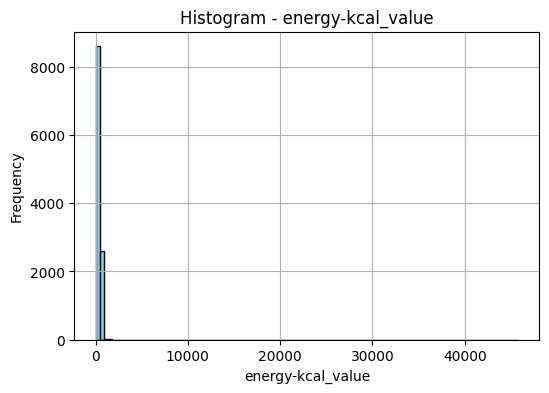

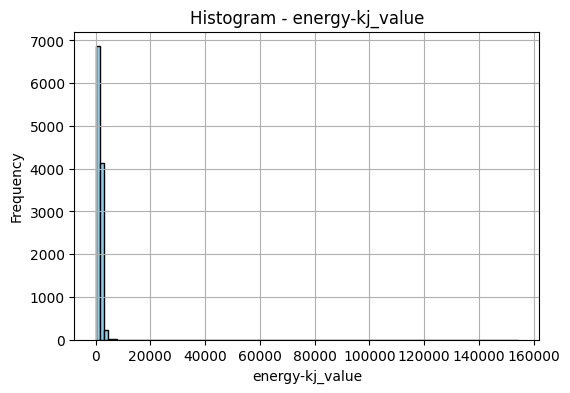

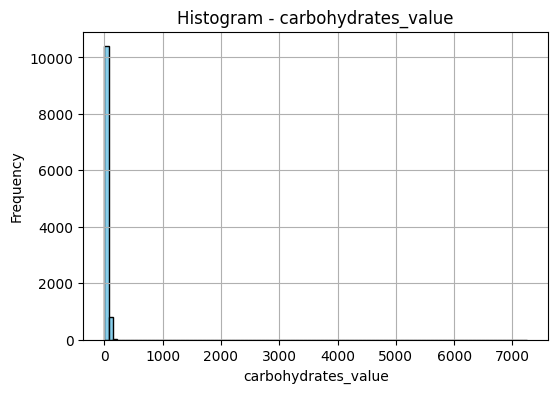

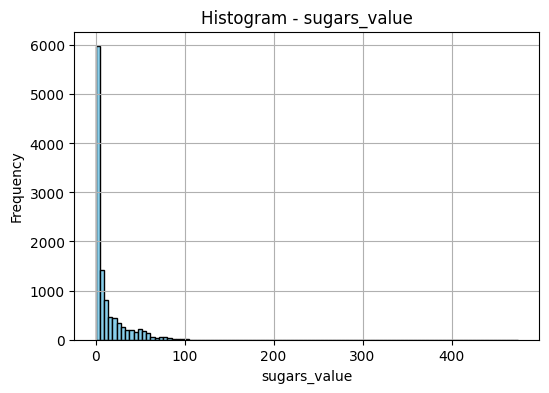

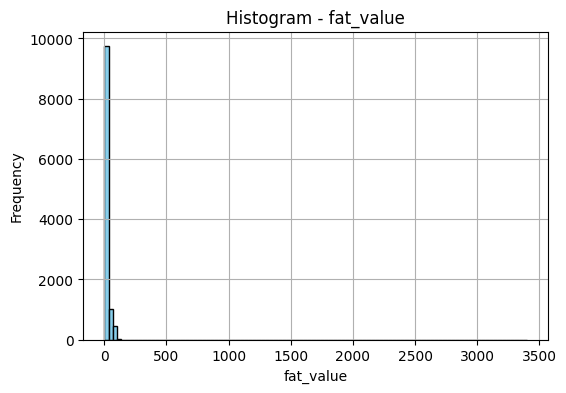

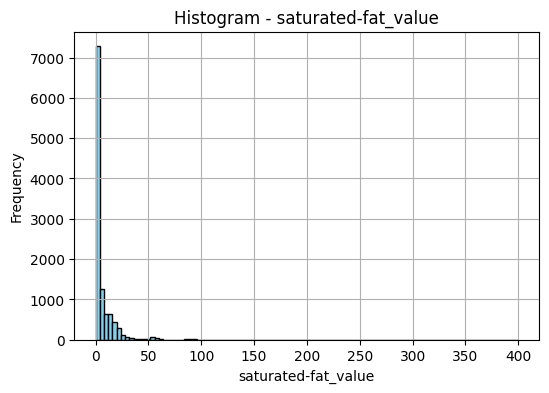

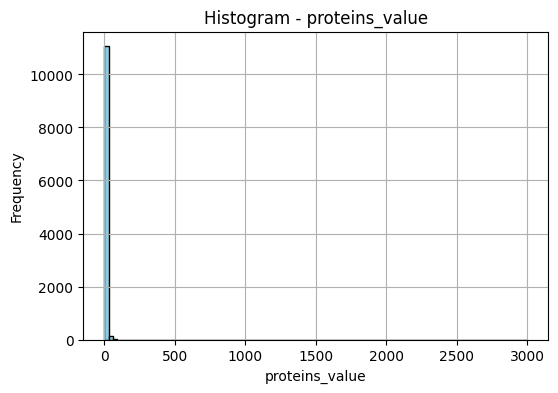

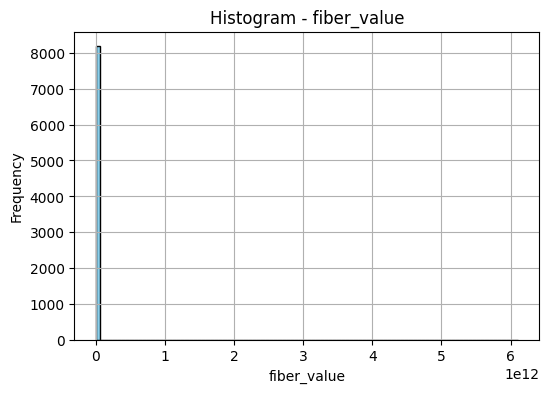

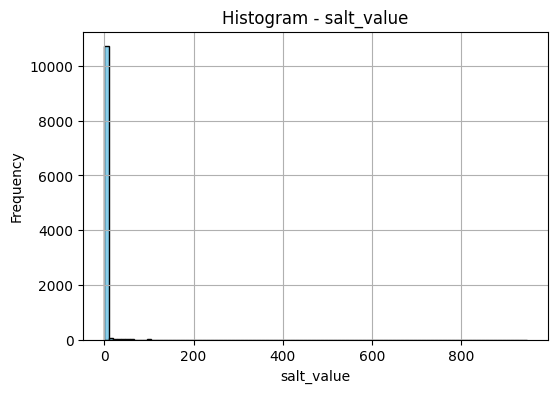

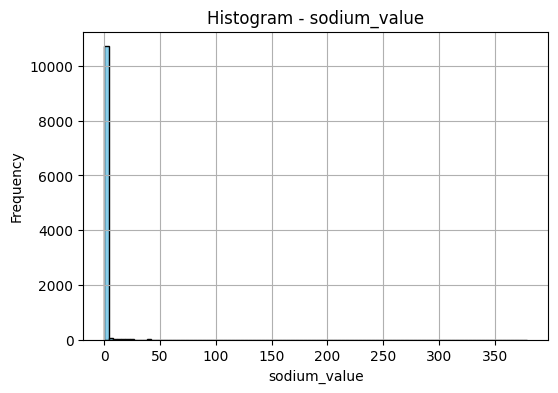

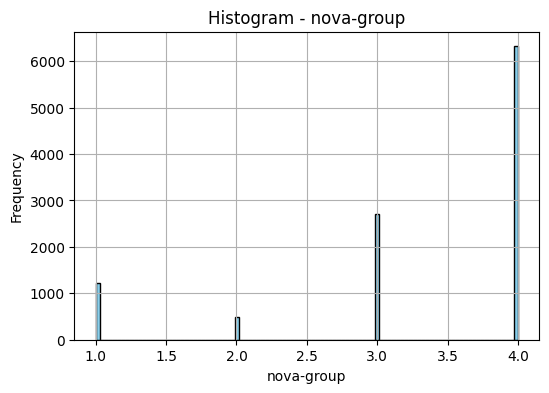

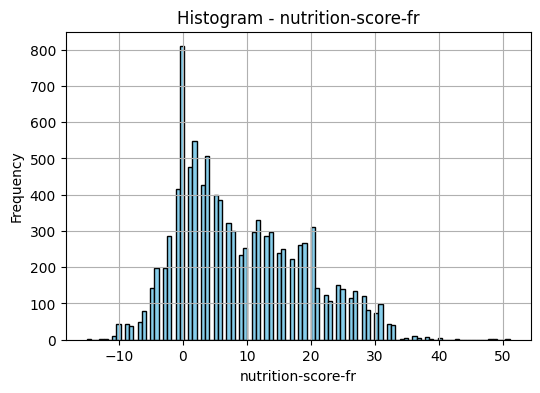

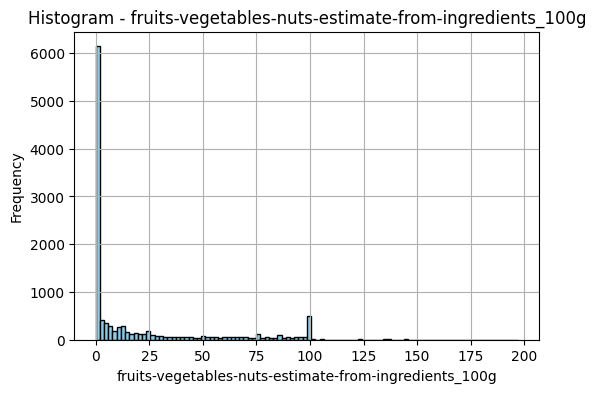

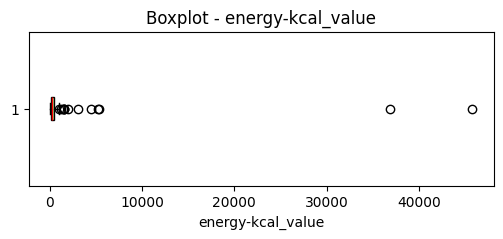

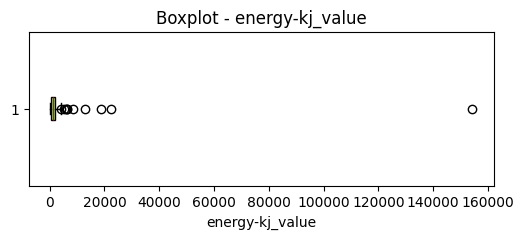

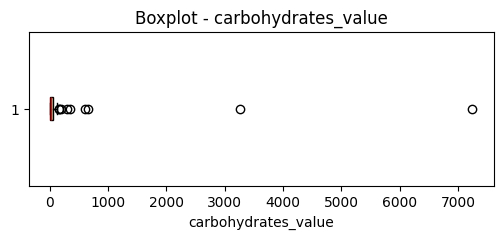

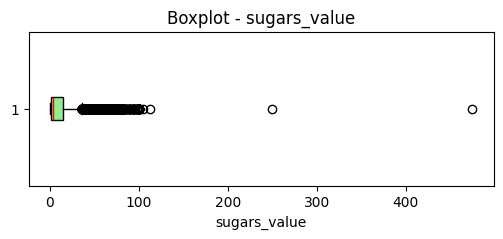

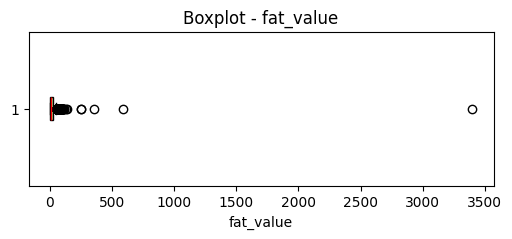

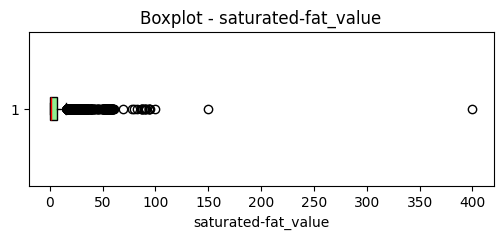

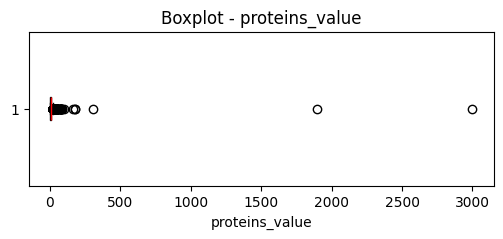

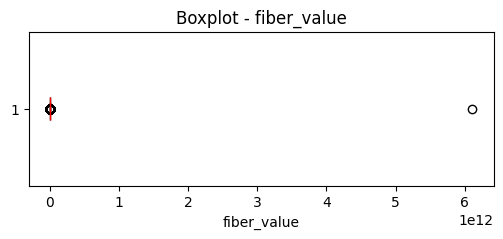

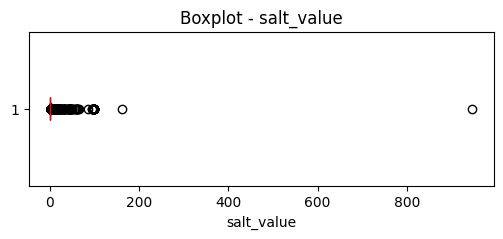

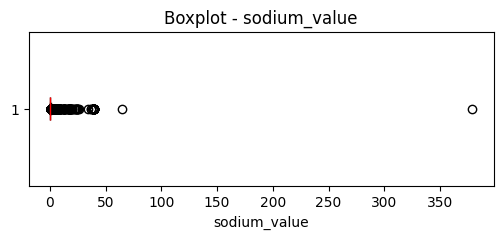

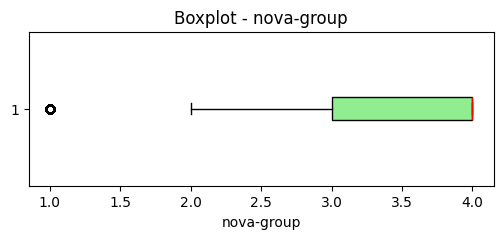

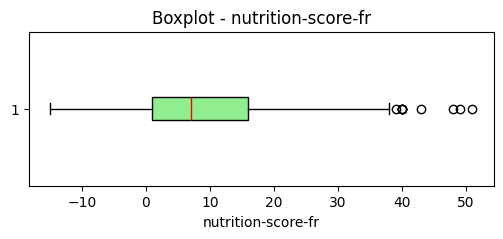

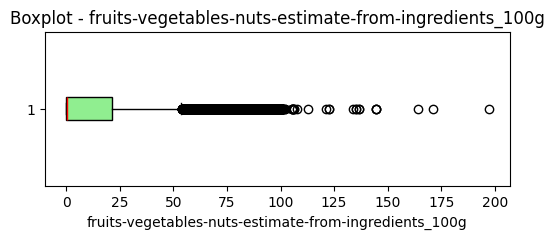

In [31]:
import matplotlib.pyplot as plt

# Select only numeric columns (excluding product_code if needed)
numeric_cols = df_selected.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != "product_code"]

# Plot histograms
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    df_selected[col].dropna().hist(bins=100, color="skyblue", edgecolor="black")
    plt.title(f"Histogram - {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Plot boxplots
for col in numeric_cols:
    plt.figure(figsize=(6,2))
    plt.boxplot(df_selected[col].dropna(), vert=False, patch_artist=True,
                boxprops=dict(facecolor="lightgreen", color="black"),
                medianprops=dict(color="red"))
    plt.title(f"Boxplot - {col}")
    plt.xlabel(col)
    plt.show()


In [32]:
col_normal=['nutrition-score-fr']

In [33]:
# Normal distributed columns
list_normal = ["nutrition-score-fr"]

# Skewed columns (all others from your numeric features)
list_skewed = [
    "energy-kcal_value",
    "energy-kj_value",
    "carbohydrates_value",
    "sugars_value",
    "fat_value",
    "saturated-fat_value",
    "proteins_value",
    "fiber_value",
    "salt_value",
    "sodium_value",
    "nova-group",
    "fruits-vegetables-nuts-estimate-from-ingredients_100g",
    
]

In [34]:
# Grouped median imputation
df_selected = df_selected.copy()  # avoid inplace issues

# Loop over each numeric column
for col in list_normal:
    df_selected[col] = df_selected.groupby(["brand", "product_name"])[col].transform(
        lambda x: x.fillna(x.median())
    )
for col in list_skewed:
    df_selected[col] = df_selected.groupby(["brand", "product_name"])[col].transform(
        lambda x: x.fillna(x.mean())
    )

C:\Users\Kamal raj\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Kamal raj\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Kamal raj\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Kamal raj\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Kamal raj\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Kamal 

In [35]:
df_selected.isnull().mean() * 100

product_code                                              0.000000
product_name                                              0.000000
brand                                                     0.000000
energy-kcal_value                                         3.351955
energy-kj_value                                           3.351955
carbohydrates_value                                       3.687151
sugars_value                                              5.191233
fat_value                                                 3.515256
saturated-fat_value                                       5.732703
proteins_value                                            3.566824
fiber_value                                              28.689300
salt_value                                                6.110872
sodium_value                                              6.110872
nova-group                                                7.288354
nutrition-score-fr                                       10.63

In [36]:
# Step 1: Grouped by brand+product
for col in list_normal:
    df_selected[col] = df_selected.groupby(["brand", "product_name"])[col].transform(
        lambda x: x.fillna(x.median())
    )

for col in list_skewed:
    df_selected[col] = df_selected.groupby(["brand", "product_name"])[col].transform(
        lambda x: x.fillna(x.mean())
    )

# Step 2: Fallback — group by brand only
for col in list_normal + list_skewed:
    df_selected[col] = df_selected.groupby("brand")[col].transform(
        lambda x: x.fillna(x.median())
    )

# Step 3: Fallback — global fill
for col in list_normal:
    df_selected[col] = df_selected[col].fillna(df_selected[col].median())
for col in list_skewed:
    df_selected[col] = df_selected[col].fillna(df_selected[col].mean())


C:\Users\Kamal raj\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Kamal raj\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Kamal raj\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Kamal raj\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Kamal raj\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Kamal 

In [37]:
#df_selected['sugar_to_carb_ratio']=df_selected['sugars_value']/df_selected['carbohydrates_value'] it gives 0/0 as nan 
import numpy as np

df_selected["sugar_to_carb_ratio"] = np.where(
    (df_selected["sugars_value"] == 0) & (df_selected["carbohydrates_value"] == 0), 
    0, 
    df_selected["sugars_value"] / df_selected["carbohydrates_value"]
)

In [38]:
# 1. Calorie Category (based on kcal/100g)
def calorie_category(kcal):
    if pd.isna(kcal):
        return "Unknown"
    elif kcal < 150:
        return "Low"
    elif kcal < 400:
        return "Moderate"
    else:
        return "High"

df_selected["calorie_category"] = df_selected["energy-kcal_value"].apply(calorie_category)


# 2. Sugar Category (based on sugar/100g)
def sugar_category(sugar):
    if pd.isna(sugar):
        return "Unknown"
    elif sugar < 5:
        return "Low Sugar"
    elif sugar < 15:
        return "Moderate Sugar"
    else:
        return "High Sugar"

df_selected["sugar_category"] = df_selected["sugars_value"].apply(sugar_category)


# 3. Ultra-Processed Flag (based on nova-group)
df_selected["is_ultra_processed"] = df_selected["nova-group"].apply(
    lambda x: "Yes" if x == 4 else ("No" if pd.notna(x) else "Unknown"))

In [39]:
df_selected.columns

Index(['product_code', 'product_name', 'brand', 'energy-kcal_value',
       'energy-kj_value', 'carbohydrates_value', 'sugars_value', 'fat_value',
       'saturated-fat_value', 'proteins_value', 'fiber_value', 'salt_value',
       'sodium_value', 'nova-group', 'nutrition-score-fr',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'sugar_to_carb_ratio', 'calorie_category', 'sugar_category',
       'is_ultra_processed'],
      dtype='object')

In [40]:
df_selected.to_pickle("df_selected.pkl")


In [8]:
%pip uninstall pandas


^C
Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install pandas 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

In [2]:
df_cleaned = pd.read_pickle("df_selected.pkl")
print(df_cleaned.head())

    product_code            product_name  \
0  6111035000430                Sidi Ali   
1  6111242100992                   Perly   
2  6111035002175                Sidi Ali   
3  6111035000058  Eau minérale naturelle   
4  6111252421568                اكوافينا   

                                  brand  energy-kcal_value  energy-kj_value  \
0                              Sidi Ali           0.000000         2.000000   
1                                Jaouda          97.000000       406.000000   
2                              sidi ali         299.834958      1233.831924   
3  Les Eaux Minérales d'oulmès,Sidi Ali         299.834958      1233.831924   
4                              AQUAFINA           0.000000         0.000000   

   carbohydrates_value  sugars_value  fat_value  saturated-fat_value  \
0             4.200000        1.4000   0.000000             0.000000   
1             9.400000        7.5000   3.000000             1.000000   
2            31.209908       11.9399  15.575

In [4]:
df_selected.columns

NameError: name 'df_selected' is not defined

In [46]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11635 entries, 0 to 12096
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   product_code                                           11635 non-null  object 
 1   product_name                                           11635 non-null  object 
 2   brand                                                  11635 non-null  object 
 3   energy-kcal_value                                      11635 non-null  float64
 4   energy-kj_value                                        11635 non-null  float64
 5   carbohydrates_value                                    11635 non-null  float64
 6   sugars_value                                           11635 non-null  float64
 7   fat_value                                              11635 non-null  float64
 8   saturated-fat_value                                

In [3]:
display(df_cleaned.shape)

(11635, 20)

In [4]:
df_cleaned.isna().sum()

product_code                                             0
product_name                                             0
brand                                                    0
energy-kcal_value                                        0
energy-kj_value                                          0
carbohydrates_value                                      0
sugars_value                                             0
fat_value                                                0
saturated-fat_value                                      0
proteins_value                                           0
fiber_value                                              0
salt_value                                               0
sodium_value                                             0
nova-group                                               0
nutrition-score-fr                                       0
fruits-vegetables-nuts-estimate-from-ingredients_100g    0
sugar_to_carb_ratio                                     

In [19]:
print(df_cleaned.columns.tolist())


['product_code', 'product_name', 'brand', 'energy-kcal_value', 'energy-kj_value', 'carbohydrates_value', 'sugars_value', 'fat_value', 'saturated-fat_value', 'proteins_value', 'fiber_value', 'salt_value', 'sodium_value', 'nova-group', 'nutrition-score-fr', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'sugar_to_carb_ratio', 'calorie_category', 'sugar_category', 'is_ultra_processed']


In [20]:
df_cleaned.columns = df_cleaned.columns.str.strip()


In [27]:
df_cleaned.duplicated(subset='product_code').sum()

np.int64(91)

In [26]:
#physicallyu checking sample 
# Show all rows of duplicate product_codes (but only take 5 product_code groups
# Select all rows where product_code is duplicated (both first + repeats)
dupes = df_cleaned[df_cleaned.duplicated(subset='product_code', keep=False)]

# Sort them so duplicates come next to each other
dupes = dupes.sort_values(by='product_code')

# Show first 10 rows (which should cover at least 5 duplicate groups)
dupes.head(10)




product_code               product_name                       brand  \
8437  0034361482953                      HiPro                      Danone   
7920  0034361482953                      HiPro                      Danone   
7959  0046000283234  Thick & chunky salsa mild                 Old El Paso   
8476  0046000283234  Thick & chunky salsa mild                 Old El Paso   
7094       00474030    White Sourdough Bloomer                  Sainsburys   
7928       00474030    White Sourdough Bloomer                  Sainsburys   
7240  0058449770206     Heritage Flakes Cereal               Nature’s Path   
7960  0058449770206     Heritage Flakes Cereal               Nature’s Path   
7961       00819589             Tomato Ketchup  Marks & Spencer,Simply M&S   
7277       00819589             Tomato Ketchup  Marks & Spencer,Simply M&S   

      energy-kcal_value  energy-kj_value  carbohydrates_value  sugars_value  \
8437               53.0          226.000                  3.6          3.40   
7920               53.0          226.000                  3.6          3.40   
7959               39.0          163.176                  6.2          5.20   
8476               39.0          163.176                  6.2          5.20   
7094              257.0         1090.000                 47.0          2.83   
7928              257.0         1090.000                 47.0          2.83   
7240              400.0         1673.600                 77.5         12.50   
7960              400.0         1673.600                 77.5         12.50   
7961              157.0          656.888                 36.1         35.60   
7277              157.0          656.888                 36.1         35.60   

      fat_value  saturated-fat_value  proteins_value  fiber_value  salt_value  \
8437       0.10                0.100            9.50         0.00       0.090   
7920       0.10                0.100            9.50         0.00       0.090   
7959       0.50                0.000            1.30         2.40       1.180   
8476       0.50                0.000            1.30         2.40       1.180   
7094       2.83                0.377            9.62         2.08       0.736   
7928       2.83                0.377            9.62         2.08       0.736   
7240       3.75                0.000           12.50        17.50       1.060   
7960       3.75                0.000           12.50        17.50       1.060   
7961       0.10                0.100            2.00         2.00       1.260   
7277       0.10                0.100            2.00         2.00       1.260   

      sodium_value  nova-group  nutrition-score-fr  \
8437         0.036         4.0                 0.0   
7920         0.036         4.0                 0.0   
7959         0.472         3.0                 1.0   
8476         0.472         3.0                 1.0   
7094         0.294         4.0                 2.0   
7928         0.294         4.0                 2.0   
7240         0.425         3.0                 7.0   
7960         0.425         3.0                 7.0   
7961         0.504         4.0                17.0   
7277         0.504         4.0                17.0   

      fruits-vegetables-nuts-estimate-from-ingredients_100g  \
8437                                              0.000       
7920                                              0.000       
7959                                             85.390       
8476                                             85.390       
7094                                              1.118       
7928                                              1.118       
7240                                              0.000       
7960                                              0.000       
7961                                             37.000       
7277                                             37.000       

      sugar_to_carb_ratio calorie_category  sugar_category is_ultra_processed  
8437             

In [28]:
#droping the duplicate values and keeping the last occurance
df_cleaned = df_cleaned.drop_duplicates(subset='product_code', keep='last')


In [29]:
display(df_cleaned.shape)

(11544, 20)

In [5]:
import numpy as np

df_cleaned["sugar_to_carb_ratio"] = df_cleaned["sugars_value"] / df_cleaned["carbohydrates_value"]

# Replace infinities with NaN
df_cleaned["sugar_to_carb_ratio"].replace([np.inf, -np.inf], np.nan, inplace=True)

# (Optional) Fill NaNs with 0 if you prefer
df_cleaned["sugar_to_carb_ratio"].fillna(0, inplace=True)


C:\Users\Kamal raj\AppData\Local\Temp\ipykernel_5480\2850876326.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["sugar_to_carb_ratio"].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\Kamal raj\AppData\Local\Temp\ipykernel_5480\2850876326.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [33]:
#basic statastics summary
df_cleaned.describe().T

count          mean  \
energy-kcal_value                                   11544.0  3.001488e+02   
energy-kj_value                                     11544.0  1.235121e+03   
carbohydrates_value                                 11544.0  3.124295e+01   
sugars_value                                        11544.0  1.195596e+01   
fat_value                                           11544.0  1.559807e+01   
saturated-fat_value                                 11544.0  5.281602e+00   
proteins_value                                      11544.0  7.799466e+00   
fiber_value                                         11544.0  5.958485e+08   
salt_value                                          11544.0  1.246557e+00   
sodium_value                                        11544.0  4.986542e-01   
nova-group                                          11544.0  3.321837e+00   
nutrition-score-fr                                  11544.0  8.857415e+00   
fruits-vegetables-nuts-estimate-from-ingredient...  11544.0  1.781789e+01   
sugar_to_carb_ratio                                 11544.0  5.245983e-01   

                                                             std        min  \
energy-kcal_value                                   5.865852e+02   0.000000   
energy-kj_value                                     1.685302e+03   0.000000   
carbohydrates_value                                 7.908087e+01   0.000000   
sugars_value                                        1.801257e+01   0.000000   
fat_value                                           3.784608e+01   0.000000   
saturated-fat_value                                 9.742059e+00   0.000000   
proteins_value                                      3.399404e+01   0.000000   
fiber_value                                         5.687861e+10   0.000000   
salt_value                                          1.044745e+01   0.000000   
sodium_value                                        4.180600e+00   0.000000   
nova-group                                          9.795174e-01   1.000000   
nutrition-score-fr                                  9.469468e+00 -15.000000   
fruits-vegetables-nuts-estimate-from-ingredient...  3.031351e+01  -0.066406   
sugar_to_carb_ratio                                 2.499410e+00   0.000000   

                                                           25%          50%  \
energy-kcal_value                                    99.000000   287.000000   
energy-kj_value                                     413.598200  1195.428571   
carbohydrates_value                                   4.800000    19.000000   
sugars_value                                          1.100000     4.300000   
fat_value                                             1.400000     7.341667   
saturated-fat_value                                   0.300000     1.600000   
proteins_value                                        1.697500     6.200000   
fiber_value                                           0.500000     3.000000   
salt_value                                            0.050000     0.400000   
sodium_value                                          0.020000     0.160000   
nova-group                                            3.000000     4.000000   
nutrition-score-fr                                    1.000000     7.000000   
fruits-vegetables-nuts-estimate-from-ingredient...    0.000000     0.082015   
sugar_to_carb_ratio                                   0.069065     0.400000   

                                                            75%           max  
energy-kcal_value                                    443.000000  4.579350e+04  
energy-kj_value                                     1857.000000  1.543896e+05  
carbohydrates_value                                   57.000000  7.250000e+03  
sugars_value                                          14.000000  4.750000e+02  
fat_value                                             22.000000  3.400000e+03  
saturated-fat_value                           

In [6]:
df_cleaned.describe(include='object')

product_code product_name      brand calorie_category sugar_category  \
count         11635        11635      11635            11635          11635   
unique        11544        10071       3974                3              3   
top        10023594               Hacendado         Moderate      Low Sugar   
freq              2          268        351             4191           6418   

       is_ultra_processed  
count               11635  
unique                  2  
top                   Yes  
freq                 6700

📊 Univariate Inference (Basic Insights)

Most products have moderate calories (~300 kcal/100g) but extreme outliers exist.

Sugars are skewed — median = 4.3g, but some extreme sugary items.

Fat median ~7.3g → many low-fat products, but some high-fat outliers.

Protein median = 6.2g, max = 3000 → suspicious outlier.

Fiber, salt, sodium have data quality issues (wrong units or bad entries).

Categories (calorie_category, sugar_category, is_ultra_processed) show that ultra-processed & low sugar, moderate calorie products dominate.


bivarient analysis


In [7]:
correlation_matrix = df_cleaned[['energy-kcal_value', 'energy-kj_value', 'carbohydrates_value', 'sugars_value', 'fat_value', 'saturated-fat_value', 'proteins_value', 'fiber_value', 'salt_value', 'sodium_value', 'nova-group', 'nutrition-score-fr', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'sugar_to_carb_ratio',]].corr()
display(correlation_matrix)

energy-kcal_value  \
energy-kcal_value                                            1.000000   
energy-kj_value                                              0.688783   
carbohydrates_value                                          0.822427   
sugars_value                                                 0.240352   
fat_value                                                    0.801951   
saturated-fat_value                                          0.493767   
proteins_value                                               0.917017   
fiber_value                                                 -0.004126   
salt_value                                                  -0.014287   
sodium_value                                                -0.014281   
nova-group                                                  -0.006305   
nutrition-score-fr                                           0.171519   
fruits-vegetables-nuts-estimate-from-ingredient...          -0.003061   
sugar_to_carb_ratio                                         -0.016462   

                                                    energy-kj_value  \
energy-kcal_value                                          0.688783   
energy-kj_value                                            1.000000   
carbohydrates_value                                        0.799624   
sugars_value                                               0.337746   
fat_value                                                  0.292605   
saturated-fat_value                                        0.313258   
proteins_value                                             0.476597   
fiber_value                                               -0.005881   
salt_value                                                -0.021808   
sodium_value                                              -0.021800   
nova-group                                                 0.013235   
nutrition-score-fr                                         0.239590   
fruits-vegetables-nuts-estimate-from-ingredient...         0.002696   
sugar_to_carb_ratio                                       -0.021645   

                                                    carbohydrates_value  \
energy-kcal_value                                              0.822427   
energy-kj_value                                                0.799624   
carbohydrates_value                                            1.000000   
sugars_value                                                   0.397397   
fat_value                                                      0.344123   
saturated-fat_value                                            0.151142   
proteins_value                                                 0.755329   
fiber_value                                                   -0.002490   
salt_value                                                    -0.011450   
sodium_value                                                  -0.011446   
nova-group                                                     0.044576   
nutrition-score-fr                                             0.126739   
fruits-vegetables-nuts-estimate-from-ingredient...            -0.084087   
sugar_to_carb_ratio                                           -0.022822   

                                                    sugars_value  fat_value  \
energy-kcal_value                                       0.240352   0.801951   
energy-kj_value                                         0.337746   0.292605   
carbohydrates_value                                     0.397397   0.344123   
sugars_value                                            1.000000   0.020101   
fat_value                                               0.020101   1.000000   
saturated-fat_value                                     0.082017   0.673442   
proteins_value                                          0.104212   0.728781   
fiber_value                                            -0.000604  -0.003788   
salt_value                                           

In [37]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


bivariate analysis numeric vs numeric data

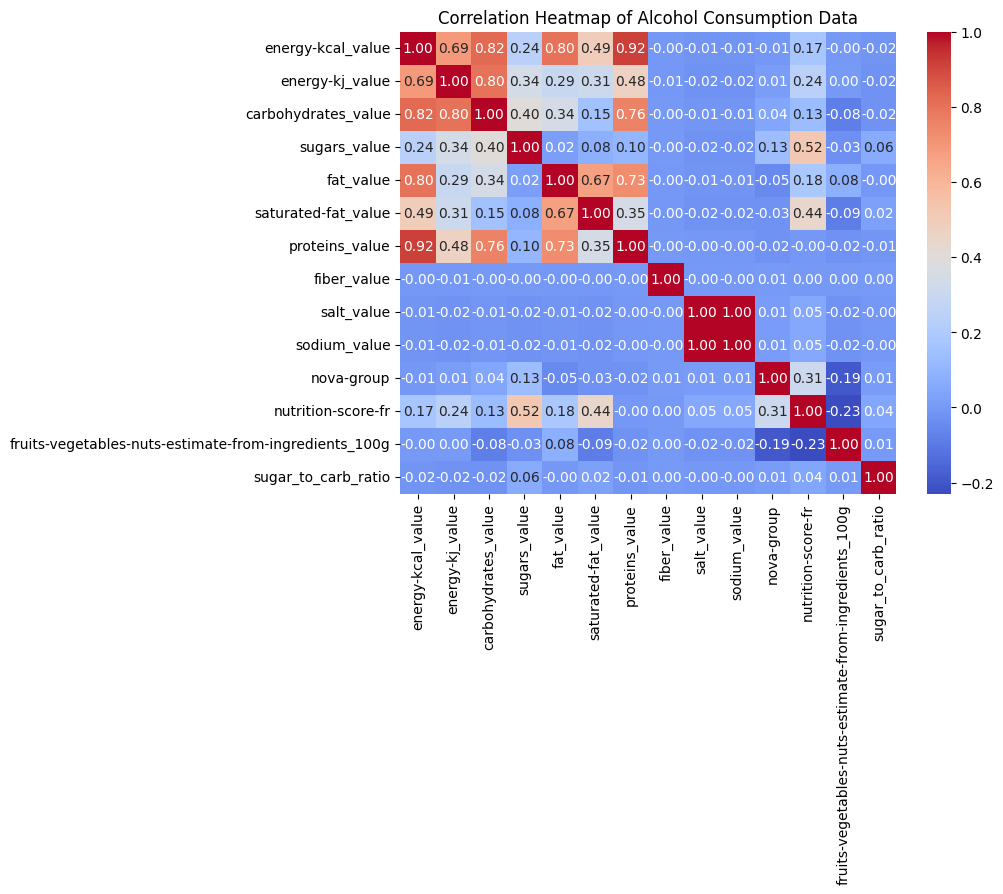

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Alcohol Consumption Data')
plt.show()

numeric vs catagorical dat

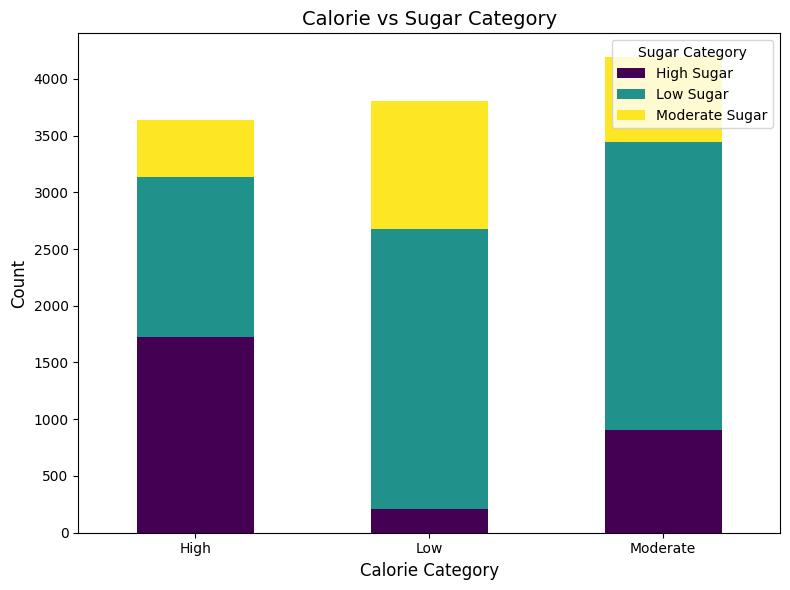

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: calorie_category vs sugar_category, split by ultra-processed
ct = pd.crosstab(
    index=df_cleaned['calorie_category'],       # rows (X-axis groups)
    columns=df_cleaned['sugar_category'],       # stacked bars
    values=None,                                # optional (we're just counting)
    aggfunc=None
)

ax = ct.plot(
    kind="bar",          # bar chart
    stacked=True,        # stack the bars instead of side-by-side
    figsize=(8,6),       # figure size
    colormap="viridis"   # color theme
)

plt.title("Calorie vs Sugar Category", fontsize=14)
plt.xlabel("Calorie Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Sugar Category")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


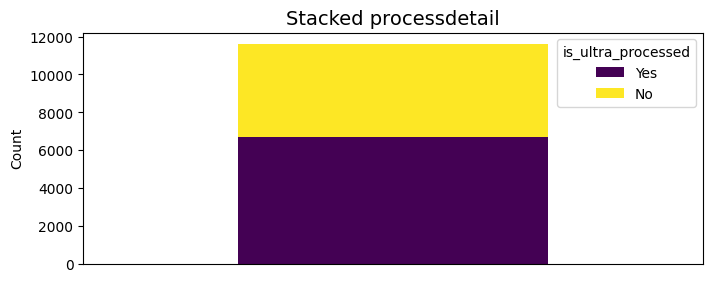

In [10]:
counts = df_cleaned['is_ultra_processed'].value_counts()

# Create a DataFrame with one row
counts_df = counts.to_frame().T

# Plot as stacked bar
counts_df.plot(
    kind="bar",
    stacked=True,
    figsize=(8,3),
    colormap="viridis"
)

plt.title("Stacked processdetail", fontsize=14)
plt.xlabel("")
plt.ylabel("Count")
plt.xticks([])
plt.show()


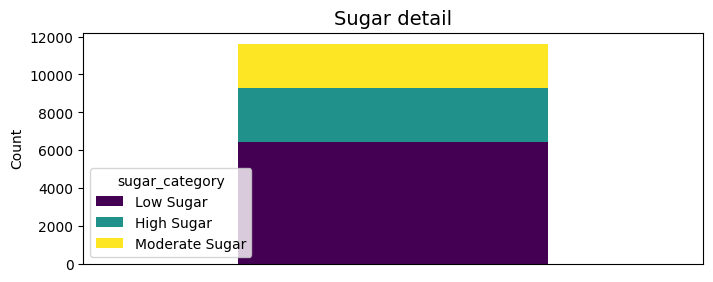

In [11]:
counts = df_cleaned['sugar_category'].value_counts()

# Create a DataFrame with one row
counts_df = counts.to_frame().T

# Plot as stacked bar
counts_df.plot(
    kind="bar",
    stacked=True,
    figsize=(8,3),
    colormap="viridis"
)

plt.title("Sugar detail", fontsize=14)
plt.xlabel("")
plt.ylabel("Count")
plt.xticks([])
plt.show()

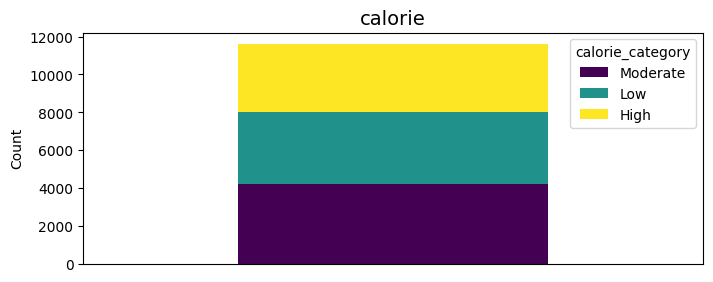

In [12]:
counts = df_cleaned['calorie_category'].value_counts()

# Create a DataFrame with one row
counts_df = counts.to_frame().T

# Plot as stacked bar
counts_df.plot(
    kind="bar",
    stacked=True,
    figsize=(8,3),
    colormap="viridis"
)

plt.title("calorie", fontsize=14)
plt.xlabel("")
plt.ylabel("Count")
plt.xticks([])
plt.show()

In [16]:
c0=df_cleaned[df_cleaned['is_ultra_processed']=='Yes']['sugars_value']
c1=df_cleaned[df_cleaned['is_ultra_processed']=='No']['sugars_value']

In [ ]:
# need to check the sugar level equality e


import scipy.stats as st
st.ttest_ind(c0,c1,equal_var=True)

TtestResult(statistic=np.float64(17.8596270439506), pvalue=np.float64(2.1109861369351505e-70), df=np.float64(11633.0))

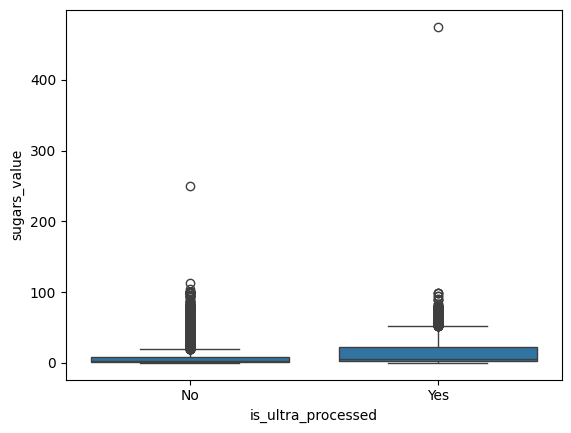

F_onewayResult(statistic=np.float64(318.9662781490117), pvalue=np.float64(2.110986136927046e-70))

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='is_ultra_processed',y="sugars_value",data=df_cleaned)
plt.show()
st.f_oneway(c0,c1,)

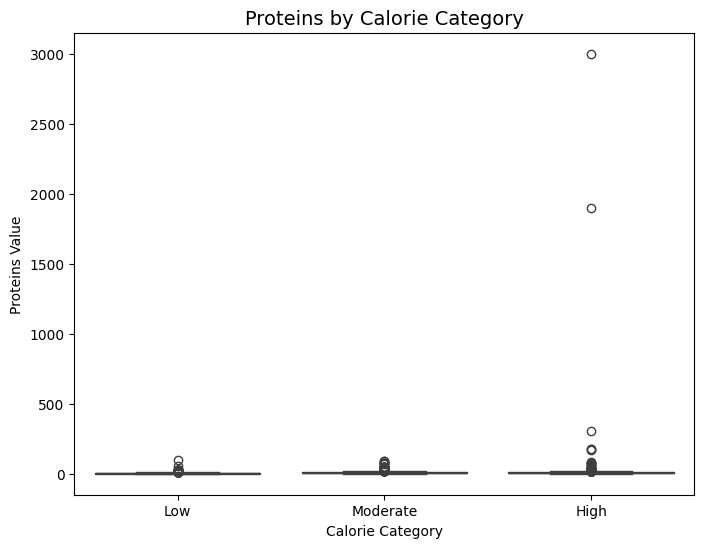

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(
    data=df_cleaned,
    x="calorie_category",   # categorical column
    y="proteins_value"      # numerical column
)
plt.title("Proteins by Calorie Category", fontsize=14)
plt.ylabel("Proteins Value")
plt.xlabel("Calorie Category")
plt.show()


In [21]:
df_cleaned.columns

Index(['product_code', 'product_name', 'brand', 'energy-kcal_value',
       'energy-kj_value', 'carbohydrates_value', 'sugars_value', 'fat_value',
       'saturated-fat_value', 'proteins_value', 'fiber_value', 'salt_value',
       'sodium_value', 'nova-group', 'nutrition-score-fr',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'sugar_to_carb_ratio', 'calorie_category', 'sugar_category',
       'is_ultra_processed'],
      dtype='object')

types of calory and sugar values

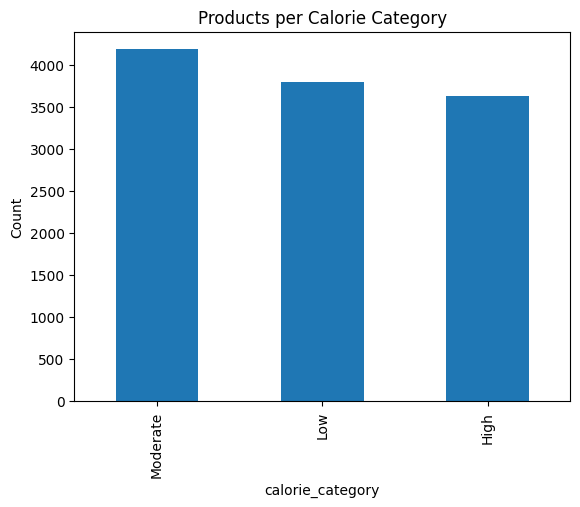

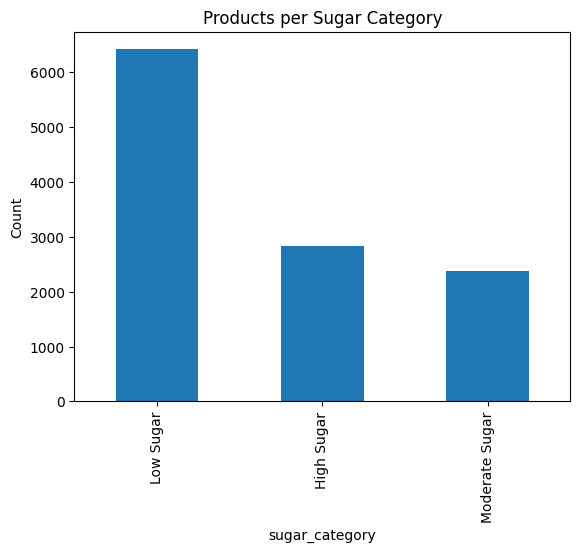

In [26]:
df_cleaned['calorie_category'].value_counts().plot(kind='bar')
plt.title("Products per Calorie Category")
plt.ylabel("Count")
plt.show()

df_cleaned['sugar_category'].value_counts().plot(kind='bar')
plt.title("Products per Sugar Category")
plt.ylabel("Count")
plt.show()


2-pie chart for nova group

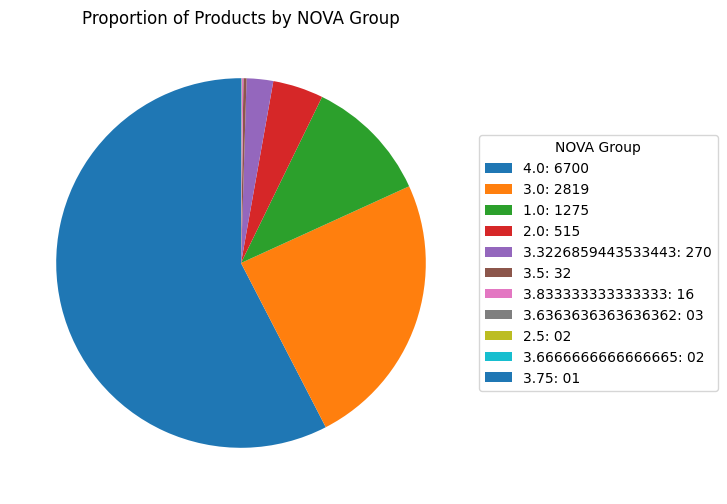

In [31]:
import matplotlib.pyplot as plt

# Value counts
nova_counts = df_cleaned['nova-group'].value_counts()

# Pie chart without numbers inside
plt.figure(figsize=(6,6))
wedges, texts = plt.pie(nova_counts, startangle=90)

# Format counts with 2 digits (e.g., 03, 15)
labels = [f"{cat}: {count:02d}" for cat, count in zip(nova_counts.index, nova_counts.values)]

# Add legend
plt.legend(wedges, labels,
           title="NOVA Group",
           loc="center left",
           bbox_to_anchor=(1, 0.5))

plt.title("Proportion of Products by NOVA Group")
plt.show()



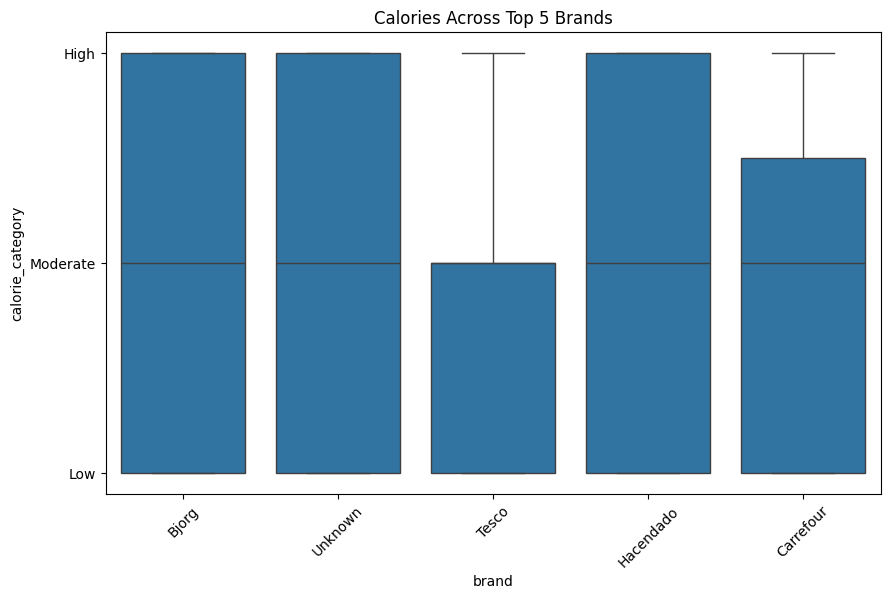

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Find top 5 brands by product count
top5_brands = df_cleaned['brand'].value_counts().head(5).index

# Filter dataset
df_top5 = df_cleaned[df_cleaned['brand'].isin(top5_brands)]

# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df_top5, x="brand", y="calorie_category")
plt.title("Calories Across Top 5 Brands")
plt.xticks(rotation=45)
plt.show()


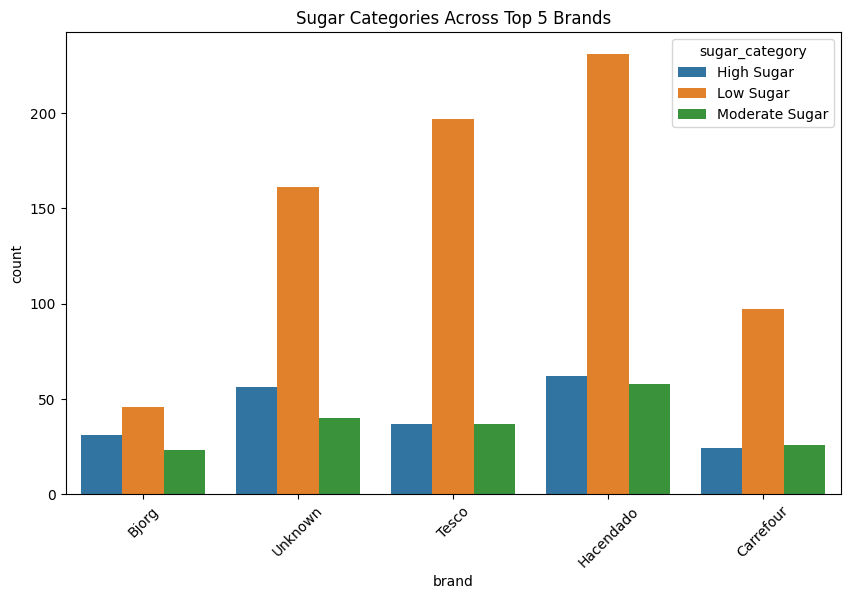

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_top5, x="brand", hue="sugar_category")
plt.title("Sugar Categories Across Top 5 Brands")
plt.xticks(rotation=45)
plt.show()


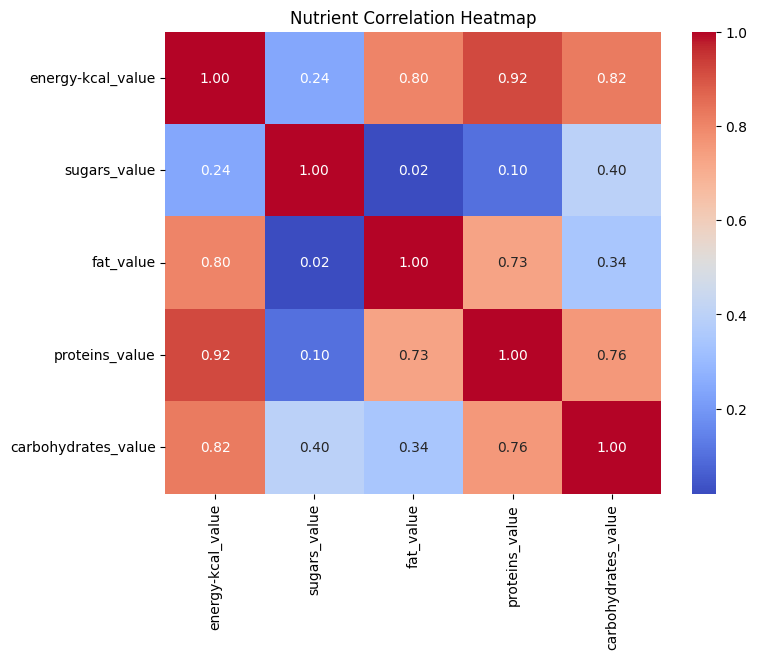

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric nutrient columns
nutrient_cols = ['energy-kcal_value', 'sugars_value', 'fat_value', 
                 'proteins_value', 'carbohydrates_value']

plt.figure(figsize=(8,6))
sns.heatmap(df_cleaned[nutrient_cols].corr(), 
            annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Nutrient Correlation Heatmap")
plt.show()



In [42]:
import mysql.connector

# Connect again (if not already connected)
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",     
    database="project1"
)
mycursor = mydb.cursor()

# Insert into product_info
product_sql = """
INSERT INTO product_info (product_code, product_name, brand)
VALUES (%s, %s, %s)
ON DUPLICATE KEY UPDATE 
    product_name=VALUES(product_name),
    brand=VALUES(brand);
"""

product_data = df_cleaned[['product_code','product_name','brand']].values.tolist()
mycursor.executemany(product_sql, product_data)
mydb.commit()
print(f"✅ Inserted {mycursor.rowcount} rows into product_info")


✅ Inserted 11544 rows into product_info


In [43]:
nutrient_sql = """
INSERT INTO nutrient_info (
    product_code, energy_kcal_value, energy_kj_value, carbohydrates_value, 
    sugars_value, fat_value, saturated_fat_value, proteins_value, fiber_value, 
    salt_value, sodium_value, fruits_vegetables_nuts_estimate_100g, 
    nutrition_score_fr, nova_group
) VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
ON DUPLICATE KEY UPDATE 
    energy_kcal_value=VALUES(energy_kcal_value),
    energy_kj_value=VALUES(energy_kj_value),
    carbohydrates_value=VALUES(carbohydrates_value),
    sugars_value=VALUES(sugars_value),
    fat_value=VALUES(fat_value),
    saturated_fat_value=VALUES(saturated_fat_value),
    proteins_value=VALUES(proteins_value),
    fiber_value=VALUES(fiber_value),
    salt_value=VALUES(salt_value),
    sodium_value=VALUES(sodium_value),
    fruits_vegetables_nuts_estimate_100g=VALUES(fruits_vegetables_nuts_estimate_100g),
    nutrition_score_fr=VALUES(nutrition_score_fr),
    nova_group=VALUES(nova_group);
"""

nutrient_cols = ['product_code','energy-kcal_value','energy-kj_value','carbohydrates_value',
                 'sugars_value','fat_value','saturated-fat_value','proteins_value',
                 'fiber_value','salt_value','sodium_value',
                 'fruits-vegetables-nuts-estimate-from-ingredients_100g',
                 'nutrition-score-fr','nova-group']

nutrient_data = df_cleaned[nutrient_cols].values.tolist()
mycursor.executemany(nutrient_sql, nutrient_data)
mydb.commit()
print(f"✅ Inserted {mycursor.rowcount} rows into nutrient_info")


✅ Inserted 11635 rows into nutrient_info


In [44]:
derived_sql = """
INSERT INTO derived_metrics (product_code, sugar_to_carb_ratio, calorie_category, sugar_category, is_ultra_processed)
VALUES (%s,%s,%s,%s,%s)
ON DUPLICATE KEY UPDATE 
    sugar_to_carb_ratio=VALUES(sugar_to_carb_ratio),
    calorie_category=VALUES(calorie_category),
    sugar_category=VALUES(sugar_category),
    is_ultra_processed=VALUES(is_ultra_processed);
"""

derived_cols = ['product_code','sugar_to_carb_ratio','calorie_category','sugar_category','is_ultra_processed']
derived_data = df_cleaned[derived_cols].values.tolist()
mycursor.executemany(derived_sql, derived_data)
mydb.commit()
print(f"✅ Inserted {mycursor.rowcount} rows into derived_metrics")


✅ Inserted 11635 rows into derived_metrics


In [46]:
import mysql.connector
import pandas as pd

# --- Connect to MySQL ---
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",      
    database="project1"
)
mycursor = mydb.cursor(dictionary=True)  # dictionary=True for pandas-friendly output

# --- Function to run a query and return a DataFrame ---
def run_query(query):
    mycursor.execute(query)
    result = mycursor.fetchall()
    df = pd.DataFrame(result)
    return df

# --- List of queries ---
queries = [
    # product_info
    ("Top 5 brands by product count",
     "SELECT brand, COUNT(*) AS product_count FROM product_info GROUP BY brand ORDER BY product_count DESC LIMIT 5;"),
    
    ("Count products per brand",
     "SELECT brand, COUNT(*) AS product_count FROM product_info GROUP BY brand ORDER BY product_count DESC;"),
    
    ("Products with missing product name",
     "SELECT * FROM product_info WHERE product_name IS NULL OR product_name = '';"),
    
    # nutrient_info
    ("Average sugars_value per nova-group",
     "SELECT nova_group, AVG(sugars_value) AS avg_sugars FROM nutrient_info GROUP BY nova_group;"),
    
    ("Top 10 products with highest energy-kcal_value",
     "SELECT product_code, energy_kcal_value FROM nutrient_info ORDER BY energy_kcal_value DESC LIMIT 10;"),
    
    # derived_metrics
    ("Count products per calorie_category",
     "SELECT calorie_category, COUNT(*) AS count FROM derived_metrics GROUP BY calorie_category;"),
    
    ("Products that are both High Calorie and High Sugar",
     "SELECT * FROM derived_metrics WHERE calorie_category = 'High' AND sugar_category = 'High';"),
    
    # join queries
    ("Top 5 brands with most High Calorie products",
     """
     SELECT p.brand, COUNT(*) AS high_calorie_count
     FROM product_info p
     JOIN derived_metrics d ON p.product_code = d.product_code
     WHERE d.calorie_category = 'High'
     GROUP BY p.brand
     ORDER BY high_calorie_count DESC
     LIMIT 5;
     """)
]

# --- Dictionary to store results ---
results = {}

# --- Loop through queries ---
for name, query in queries:
    df = run_query(query)
    results[name] = df
    print(f"✅ Query '{name}' executed. Rows fetched: {len(df)}")

# --- Example: access a result ---
print(results["Top 5 brands by product count"])



✅ Query 'Top 5 brands by product count' executed. Rows fetched: 5
✅ Query 'Count products per brand' executed. Rows fetched: 3369
✅ Query 'Products with missing product name' executed. Rows fetched: 267
✅ Query 'Average sugars_value per nova-group' executed. Rows fetched: 4
✅ Query 'Top 10 products with highest energy-kcal_value' executed. Rows fetched: 10
✅ Query 'Count products per calorie_category' executed. Rows fetched: 3
✅ Query 'Products that are both High Calorie and High Sugar' executed. Rows fetched: 0
✅ Query 'Top 5 brands with most High Calorie products' executed. Rows fetched: 5
       brand  product_count
0  Hacendado            371
1      Tesco            275
2    Unknown            257
3  Carrefour            148
4      Bjorg            104
